In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/refs/heads/main/global_Power_plant_database.csv')
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [2]:
#Data information
data.info()

#Checking for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

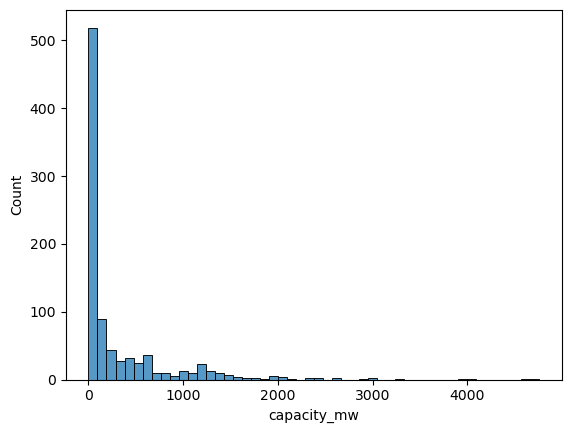

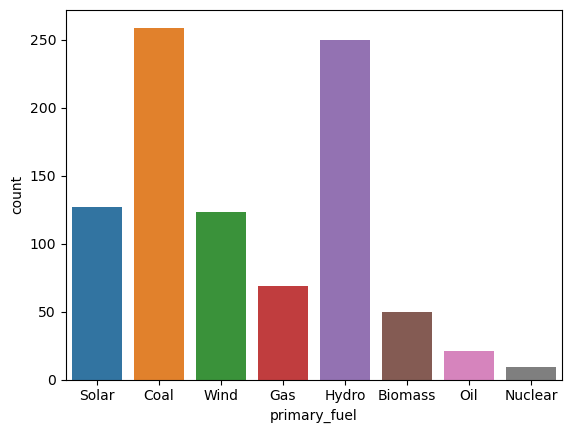

In [3]:
# Count unique values in categorical columns
data['primary_fuel'].value_counts()

# Visualize the distribution of 'capacity_mw' and 'primary_fuel'
sns.histplot(data['capacity_mw'], bins=50)
plt.show()

sns.countplot(x='primary_fuel', data=data)
plt.show()

In [4]:
# Convert string to numeric
#data['capacity_mw'] = pd.to_numeric(data['capacity_mw'], errors='coerce')

# Handle missing values by filling or dropping

#data.fillna(data.mean(), inplace=True)
#data['capacity_mw'].fillna(data['capacity_mw'].mean(), inplace=True)

numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
float_cols = data.select_dtypes(include=['float64']).columns.tolist()

# Replace missing values in numerical columns with mean
for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)  
# Replace missing values in categorical columns with mode
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)    
# Filling missing values in float64 columns with mean or median
for col in float_cols:
    data[col].fillna(data[col].mean(), inplace=True)
    
data['other_fuel3'].fillna('unknown', inplace=True) 
data['estimated_generation_gwh'].fillna(0, inplace=True)
    

# Label encode the 'primary_fuel' column
#le = LabelEncoder()
#data['primary_fuel'] = le.fit_transform(data['primary_fuel'])

# Feature scaling for 'capacity_mw'
#scaler = StandardScaler()
#data['capacity_mw_scaled'] = scaler.fit_transform(data[['capacity_mw']])

data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                   0
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source        0
estimated_generation_gwh      0
dtype: int64

In [5]:
# Drop unnessesary columns
data = data.drop(columns=['wepp_id'])
data.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
other_fuel2                 0
other_fuel3                 0
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source      0
estimated_generation_gwh    0
dtype: int64

In [9]:
# Define the target variables
y_fuel = data['primary_fuel']      
y_capacity = data['capacity_mw']      

# Drop target columns 'primary_fuel' and 'capacity_mw' from the data
X = data.drop(columns=['primary_fuel', 'capacity_mw'])

# One-hot encode the categorical columns (this should be done for both tasks)
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into train and test for Primary Fuel Classification
X_train_fuel, X_test_fuel, y_train_fuel, y_test_fuel = train_test_split(X_encoded, y_fuel, test_size=0.2, random_state=42)

# Train the Random Forest Classifier for Primary Fuel prediction
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_fuel, y_train_fuel)
y_pred_fuel = rf_classifier.predict(X_test_fuel)

# Evaluate the classification model
print('Evaluation for Classification')
print(f'Classification Report:', classification_report(y_test_fuel, y_pred_fuel))

# Split the data into train and test for Capacity Prediction (use the encoded features)
X_train_capacity, X_test_capacity, y_train_capacity, y_test_capacity = train_test_split(X_encoded, y_capacity, test_size=0.2, random_state=42)

# Train the Linear Regression model for Capacity prediction
lr = LinearRegression()
lr.fit(X_train_capacity, y_train_capacity)
y_pred_capacity = lr.predict(X_test_capacity)

# Evaluate the regression model
print('Evaluation for Regression Model')
print(f"R2 Score: {r2_score(y_test_capacity, y_pred_capacity)}")
print(f"Mean Squared Error: {mean_squared_error(y_test_capacity, y_pred_capacity)}")


Evaluation for Classification
Classification Report:               precision    recall  f1-score   support

     Biomass       0.40      1.00      0.57         6
        Coal       0.80      0.80      0.80        55
         Gas       0.50      0.10      0.16        21
       Hydro       0.75      0.91      0.82        55
         Oil       0.00      0.00      0.00         5
       Solar       1.00      1.00      1.00        18
        Wind       1.00      1.00      1.00        22

    accuracy                           0.78       182
   macro avg       0.64      0.69      0.62       182
weighted avg       0.76      0.78      0.75       182

Evaluation for Regression Model
R2 Score: 0.829775134083007
Mean Squared Error: 52650.31577628773


In [10]:
# Cross-validation for fuel classification using the encoded data
cv_scores_fuel = cross_val_score(rf_classifier, X_encoded, y_fuel, cv=5)
print(f"Cross-validation scores (Fuel): {cv_scores_fuel}")
print(f"Mean CV Score (Fuel): {cv_scores_fuel.mean()}")

# Cross-validation for capacity regression using the encoded data
cv_scores_capacity = cross_val_score(lr, X_encoded, y_capacity, cv=5)
print(f"Cross-validation scores (Capacity): {cv_scores_capacity}")
print(f"Mean CV Score (Capacity): {cv_scores_capacity.mean()}")

Cross-validation scores (Fuel): [0.7967033  0.82967033 0.85714286 0.79558011 0.77900552]
Mean CV Score (Fuel): 0.8116204237751198
Cross-validation scores (Capacity): [0.72439614 0.74007715 0.7602929  0.77992643 0.81471718]
Mean CV Score (Capacity): 0.7638819605795811


In [11]:
# Hyperparameter tuning for RandomForest
print('Hyperparameter Tuning for RandomForest')
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None]}
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5)
grid_search_rf.fit(X_train_fuel, y_train_fuel)
print(f"Best Params for RandomForest: {grid_search_rf.best_params_}")

# Hyperparameter tuning for Linear Regression
print('Hyperparameter tuning for Linear Regression')
param_grid_lr = {'fit_intercept': [True, False], 'copy_X': [True, False]}
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5)
grid_search_lr.fit(X_train_capacity, y_train_capacity)
print(f"Best Params for Linear Regression: {grid_search_lr.best_params_}")


Hyperparameter Tuning for RandomForest
Best Params for RandomForest: {'max_depth': None, 'n_estimators': 300}
Hyperparameter tuning for Linear Regression
Best Params for Linear Regression: {'copy_X': True, 'fit_intercept': True}


In [12]:
import joblib

# Save the best model
joblib.dump(grid_search_rf.best_estimator_, 'best_fuel_model.pkl')
joblib.dump(grid_search_lr.best_estimator_, 'best_capacity_model.pkl')

['best_capacity_model.pkl']